# **Space X  Falcon 9 First Stage Landing Prediction**


## Machine Learning Prediction


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [ ]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [ ]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])

## Load the dataframe


Load the data


In [ ]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")


# data = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [ ]:
X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv')


# X = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_3.csv')

X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by using the method <code>to_numpy()</code>  then we will
assign it  to the variable <code>Y</code>.


In [ ]:
y = data['Class'].to_numpy()
y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

Let's Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:

X= preprocessing.StandardScaler().fit(X).transform(X)
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


We will use the function train_test_split to split the data X and Y into training and test data. Also we will set the parameter test_size to  0.2 and random_state to 2.


<code>X_train, X_test, Y_train, Y_test</code>


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [ ]:
Y_test.shape

(18,)

# finding the best parameters

Now, let's create a logistic regression object and then create a GridSearchCV object  <code>logreg_cv</code> with cv = 10.  We will fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

logreg_cv = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters)
logreg_cv.fit(X, y)
best_parameters_lr = logreg_cv.best_params_   # Best parameters obtained
best_result_lr = logreg_cv.best_score_       # Best accuracy obtained
print(f'The best parameters are {best_parameters_lr}')
print(f"The best_result/accuracy of this model is: {best_result_lr}")

The best parameters are {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
The best_result/accuracy of this model is: 0.8222222222222222


In [ ]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression(C=0.01, penalty='l2', solver='lbfgs')
lr.fit(X_train, Y_train)
lr_predict = lr.predict(X_test)



We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8222222222222222


Let's calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
lr_score = lr.score(X_test, Y_test)
lr_score

0.8333333333333334

Lets look at the confusion matrix:


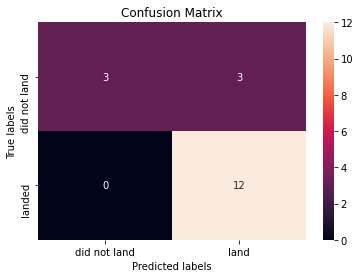

In [ ]:
yhat=lr.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


Now let's reate a support vector machine object and then create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10. 


In [ ]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

svm_grid = GridSearchCV(estimator=SVC(), param_grid=parameters)
svm_grid.fit(X, y)
best_parameters_svm = svm_grid.best_params_   # Best parameters obtained
best_result_svm = svm_grid.best_score_       # Best accuracy obtained
print(f'The best parameters are {best_parameters_svm}')
print(f"The best_result/accuracy of this model is: {best_result_svm}")


The best parameters are {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
The best_result/accuracy of this model is: 0.8111111111111111


In [ ]:
print(f'The best parameters are {best_parameters_svm}')
print(f"The best_result/accuracy of this model is: {best_result_svm}")

The best parameters are {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
The best_result/accuracy of this model is: 0.8111111111111111


In [ ]:
svm = SVC(C=1.0, gamma=0.03162277660168379, kernel='sigmoid')
svm.fit(X_train, Y_train)

SVC(gamma=0.03162277660168379, kernel='sigmoid')

Calculate the accuracy on the test data using the method <code>score</code>:


In [ ]:
svm_score = svm.score(X_test, Y_test)
svm_score

0.8333333333333334

We can plot the confusion matrix


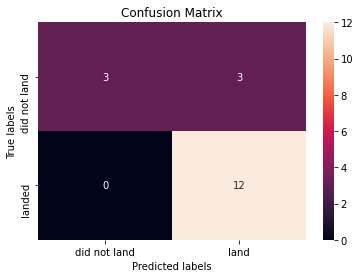

In [ ]:
yhat=svm.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Now a decision tree classifier object with a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10. 


In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree_cv = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parameters)
tree_cv.fit(X, y)
best_parameters_tree = tree_cv.best_params_   # Best parameters obtained
best_result_tree = tree_cv.best_score_       # Best accuracy obtained



In [ ]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.888888888888889


In [ ]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=2, max_features='auto', min_samples_leaf=4, min_samples_split=2, splitter='best')
tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=2, max_features='auto', min_samples_leaf=4)

Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
tree_score = tree.score(X_test, Y_test)
tree_score

0.9444444444444444

We can plot the confusion matrix


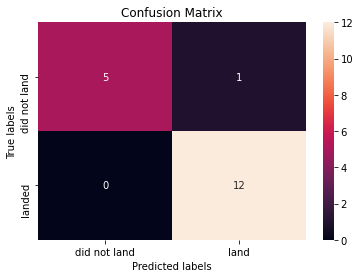

In [ ]:
yhat = tree.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

A k nearest neighbors object then  and a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10. 


In [ ]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

knn_cv = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters)
knn_cv.fit(X, y)
best_parameters_knn = knn_cv.best_params_   # Best parameters obtained
best_result_knn = knn_cv.best_score_       # Best accuracy obtained





In [ ]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

In [ ]:
KNN = KNeighborsClassifier(algorithm='auto', n_neighbors=10, p=1)
KNN.fit(X_train, Y_train)

Calculating the accuracy of tree_cv on the test data using the method <code>score</code>:


In [ ]:
KNN_score = KNN.score(X_test, Y_test)
KNN_score

We can plot the confusion matrix


In [ ]:
yhat = KNN.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# finding the best model
let's find the method performs best:


In [ ]:
model_results = pd.DataFrame({"Models": ["Decision Tree", " Logistic Regression", "KNN", "SVM"], "Score": [tree_score, lr_score, KNN_score, svm_score]})
model_results

In [ ]:
import matplotlib.pyplot as plt

df_score = model_results.groupby('Models')['Score']

model_results.plot(kind='bar', figsize=(10, 6), rot=90)

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Models Score')

plt.show()